In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl

In [20]:
n = 64 # total number of observation points
#m = 65 # length of the sequence

In [3]:
# get values from column names
katse_nr = 4
order = 2

#path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
path = 'C:/Users/Sven/Puu/Data_files/AIRSCS/wave/data_v2/'
winx = 512

path = path + "katse_0" + str(katse_nr) + "/"
# path = path + "/katse_0" + str(katse_nr)

# initial_data_file_1 = Path(path + '\sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_co_clean.csv')
# initial_data_file_2 = path + '\sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_cro_clean.csv'
# target_data_file = path + '\wavespec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_clean.csv'

initial_data_file_1 = path + '/sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_co_clean.csv'
initial_data_file_2 = path + '/sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_cro_clean.csv'
target_data_file = path + '/wavespec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_clean.csv'

initial_data_1 = pd.read_csv(initial_data_file_1, sep=',')
initial_data_2 = pd.read_csv(initial_data_file_2, sep=',')
target_data = pd.read_csv(target_data_file, sep=',')


In [4]:
input_columns = initial_data_1.columns[2:].to_list()

In [6]:
input_columns_val = np.asarray(input_columns,dtype=np.float32)
m = len(input_columns)

In [7]:
input_data = np.sin(np.log(input_columns) * 5 - 1.5) +np.cos(np.rad2deg(input_columns * 0.2 - 1)) * (-1) + 1 + np.random.normal(0, 0.3, m)
#print(len(np.random.normal(0, 0.02, m)))
#print(len(input_data), len(input_columns))

#input_data = np.cos(np.rad2deg(input_columns * 0.2 - 1)) * (-1) + 1

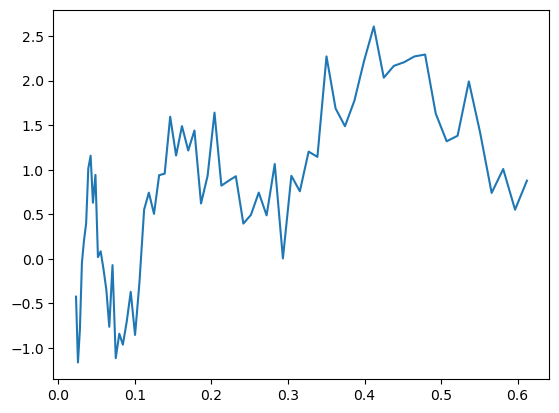

In [8]:
plt.plot(input_columns, input_data)

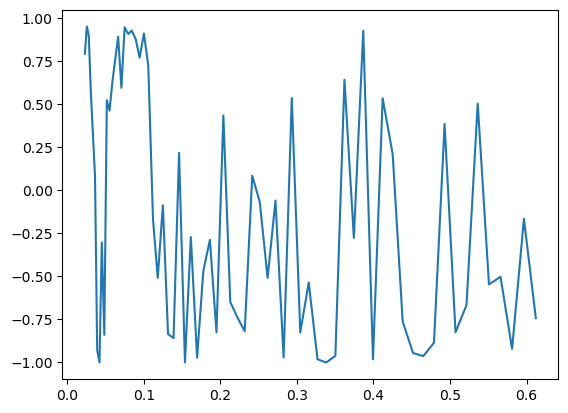

In [9]:
output_data = np.cos(np.exp(input_data))
plt.plot(input_columns, output_data)

In [28]:
def input_output_signal_generator(n, scale):
    m = len(scale)
    input_columns_val = np.asarray(scale,dtype=np.float32)
    input_data = np.zeros((n, m))
    output_data = np.zeros((n, m))
    input_data_with_noise = np.zeros((n, m))
    p1 = np.linspace(0.1, 5, n)
    p2 = np.linspace(0.1, 0.4, n)
    print(type(p1))

    for i in range(0, n):
        input_data[i, :] = np.sin(np.log(input_columns_val) * p1[i] - 1.5) +np.cos(np.rad2deg(input_columns_val * p2[i] - 1)) * (-1) + 1
        output_data[i, :] = np.cos(np.exp(input_data[i, :]))
        input_data_with_noise[i, :] = input_data[i, :] + np.random.normal(0, 0.3, m)

    input_data = pd.DataFrame(input_data, columns=scale)
    output_data = pd.DataFrame(output_data, columns=scale)
    input_data_with_noise = pd.DataFrame(input_data_with_noise, columns=scale)
    return input_data, input_data_with_noise, output_data

#+ np.random.normal(0, 0.3, m)

In [29]:
input_data, input_data_with_noise, output_data = input_output_signal_generator(n, input_columns)

<class 'numpy.ndarray'>


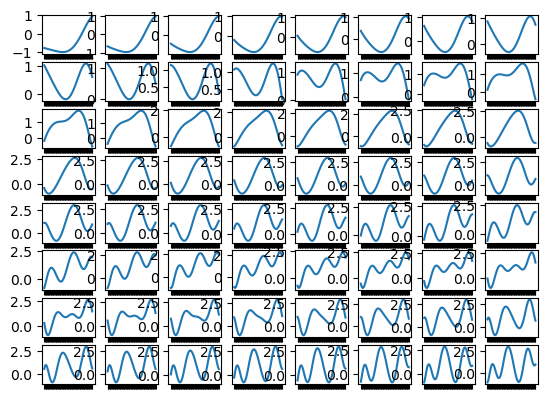

In [24]:
fig_1, axs = plt.subplots(8, 8)
for i in range(0, n):
    row_nr = int(np.floor(i / 8))
    col_nr = i % 8
    axs[row_nr, col_nr].plot(input_data.loc[i, :])
    axs[row_nr, col_nr].xaxis.set_ticklabels([])

plt.show()


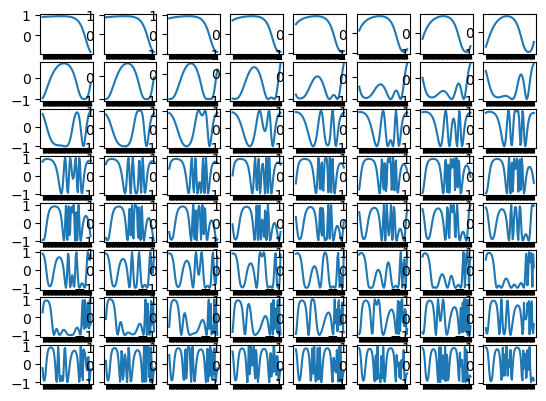

In [30]:
fig_1, axs = plt.subplots(8, 8)
for i in range(0, n):
    row_nr = int(np.floor(i / 8))
    col_nr = i % 8
    axs[row_nr, col_nr].plot(output_data.loc[i, :])
    axs[row_nr, col_nr].xaxis.set_ticklabels([])

plt.show()

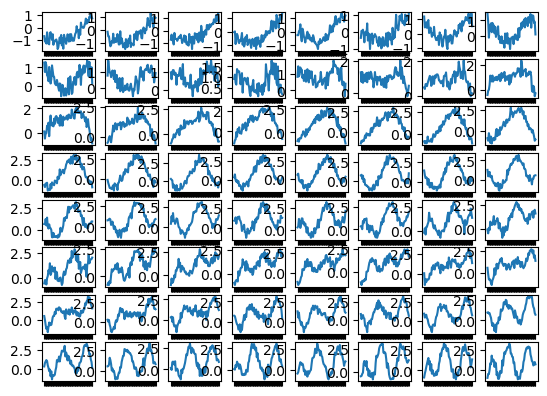

In [31]:
fig_1, axs = plt.subplots(8, 8)
for i in range(0, n):
    row_nr = int(np.floor(i / 8))
    col_nr = i % 8
    axs[row_nr, col_nr].plot(input_data_with_noise.loc[i, :])
    axs[row_nr, col_nr].xaxis.set_ticklabels([])

plt.show()

In [36]:
path_1 = 'C:/Users/Sven/Puu/Data_files/AIRSCS/wave/data_v2/Processed/'
fname_train = path_1 + 'synthetic_1.pkl'

data = [input_data, input_data_with_noise, output_data]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)
    f.close()